In [ ]:
!py -m pip install pyvista
!py -m pip install ipympl
!py -m pip install --upgrade trame
!py -m pip install scipy

In [38]:
import pyvista as pv
import numpy as np

import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [32]:
rough = pv.read("data\\B4969-B_PLANNING_pear\\rough.obj")
diamond = pv.read("data\\B4969-B_PLANNING_pear\\diamond.obj")

In [15]:
rough.plot()
diamond.plot()

Widget(value="<iframe src='http://localhost:49973/index.html?ui=P_0x1ed7ced5610_11&reconnect=auto' style='widt…

Widget(value="<iframe src='http://localhost:49973/index.html?ui=P_0x1ed7cee7b10_12&reconnect=auto' style='widt…

In [7]:
projected_rough = rough.project_points_to_plane()
projected_diamond = diamond.project_points_to_plane()

In [14]:
projected_rough.plot(show_edges=True, line_width=3)
projected_diamond.plot(show_edges=True, line_width=3)

Widget(value="<iframe src='http://localhost:49973/index.html?ui=P_0x1ed0240c750_9&reconnect=auto' style='width…

Widget(value="<iframe src='http://localhost:49973/index.html?ui=P_0x1ed023cec10_10&reconnect=auto' style='widt…

In [45]:
projected_rough_pts = np.delete(projected_rough.points, 2, 1)
projected_diamond_pts = np.delete(projected_diamond.points, 2, 1)

In [46]:
rough_hull = ConvexHull(projected_rough_pts)
diamond_hull = ConvexHull(projected_diamond_pts)

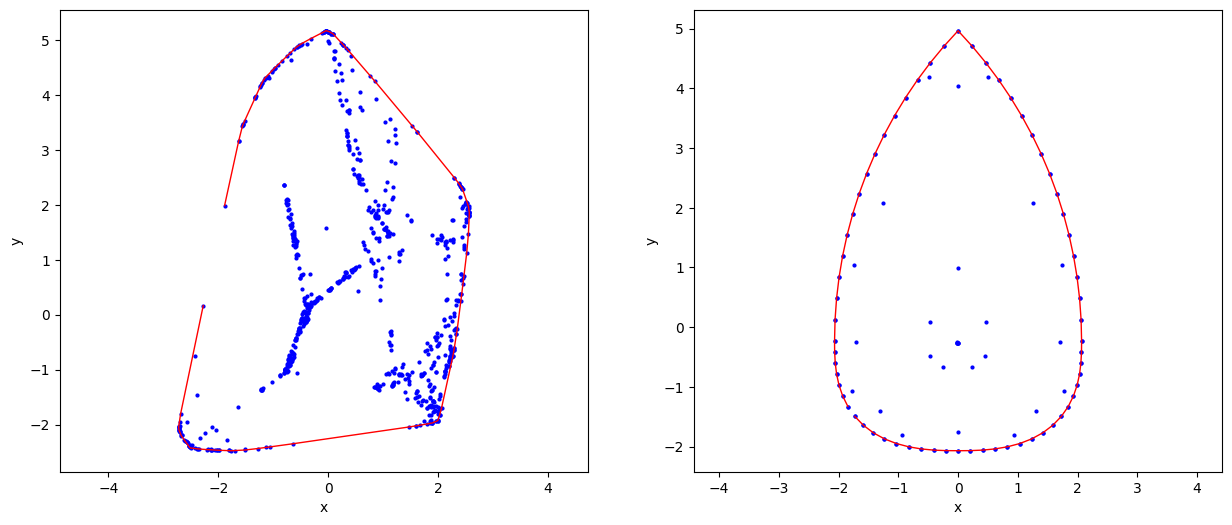

In [65]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15.0, 6.0)

axs[0].plot(projected_rough_pts[:,0], projected_rough_pts[:,1], 'b', linestyle="", marker="o",  markersize=2)
axs[0].plot(projected_rough_pts[rough_hull.vertices,0], projected_rough_pts[rough_hull.vertices,1], 'r', lw=1)
axs[0].axis('equal')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(False)

axs[1].plot(projected_diamond_pts[:,0], projected_diamond_pts[:,1], 'b', linestyle="", marker="o",  markersize=2)
axs[1].plot(projected_diamond_pts[diamond_hull.vertices,0], projected_diamond_pts[diamond_hull.vertices,1], 'r', lw=1)
axs[1].axis('equal')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid(False)